<a href="https://colab.research.google.com/github/Saputoa21/ADS_2024_Saputoa/blob/master/Saputo_Introduction_to_Computational_Linguistics_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Final Project**

## Description:

In my project, I am going to compare the performance of two models on Belarusian-to-English translation tasks:

*   **First model**: WelfCrozzo/T5-L128-belarusian, specifically trained for tanslation task in this language pair.
(translation EN to BE: <extra_id_6>, translation BE to EN: <extra_id_2>)

*   **Second model**: google/mt5-small, a pretrained model that supports more languages but hasn't been trained for this translation task.

I will fine-tune the second model using **Helsinki-NLP/opus-100** dataset for the planned language pair.

My comparison will consist of:

1.   Evaluating the first model against the second model without fine-tuning on the dataset.
2.   Fine-tuning the second model using the dataset and evaluationg it.
3.   Comparison of its performance with both the first model and its initial, non-fine-tuned state.

## The Workflow of the Project

1.   Loading the Models
2.   Exploring Models' Performance on a Downstream Translation Task
3.   Loading Metrics for Evluation (BLEU, Google BLEU, SacreBLEU
4.   Loading the Dataset
5.   Comparison of the Two Models' Performance
6.   Fine-tuning Model 2
7.   Comparison of the Two Models' Performance after Fine-tuning



---



# Loading the Models

In [ ]:
!pip install transformers
!pip install datasets
!pip install evaluate
!pip install accelerate --upgrade
!pip install sacrebleu
!pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 2.5 MB/s eta 0:00:00
   ━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

1) Loading **WelfCrozzo/T5-L128-belarusian** (Model 1)

In [ ]:
# Loading the model directly
t5_be_tokenizer = AutoTokenizer.from_pretrained("WelfCrozzo/T5-L128-belarusian")

t5_be_model = AutoModelForSeq2SeqLM.from_pretrained("WelfCrozzo/T5-L128-belarusian")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/721k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.60M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/753 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/82.7M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

2) Loading **google/mt5-small** (Model 2)

In [ ]:
# Loading the model directly
mt5_tokenizer = AutoTokenizer.from_pretrained("google/mt5-small")

mt5_model = AutoModelForSeq2SeqLM.from_pretrained("google/mt5-small")

tokenizer_config.json:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:561: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

# Exploring different tokenizers

For exploring the diffenrecies inthe work of tokenizers I have taken the code examples from Tutorial 5.

1.  **t5_be_tokenizer** from Model 1 (WelfCrozzo/T5-L128-belarusian)

In [ ]:
print(t5_be_tokenizer)

T5TokenizerFast(name_or_path='WelfCrozzo/T5-L128-belarusian', vocab_size=60000, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '<pad>', 'additional_special_tokens': ['<extra_id_0>', '<extra_id_1>', '<extra_id_2>', '<extra_id_3>', '<extra_id_4>', '<extra_id_5>', '<extra_id_6>', '<extra_id_7>', '<extra_id_8>', '<extra_id_9>', '<extra_id_10>', '<extra_id_11>', '<extra_id_12>', '<extra_id_13>', '<extra_id_14>', '<extra_id_15>', '<extra_id_16>', '<extra_id_17>', '<extra_id_18>', '<extra_id_19>', '<extra_id_20>', '<extra_id_21>', '<extra_id_22>', '<extra_id_23>', '<extra_id_24>', '<extra_id_25>', '<extra_id_26>', '<extra_id_27>', '<extra_id_28>', '<extra_id_29>', '<extra_id_30>', '<extra_id_31>', '<extra_id_32>', '<extra_id_33>', '<extra_id_34>', '<extra_id_35>', '<extra_id_36>', '<extra_id_37>', '<extra_id_38>', '<extra_id_39>', '<extra_id_40>', '<extra_id_41>', '<extra_id_42>', '<ext

In [ ]:
input_str = "Hugging face is great!"

input_tokens = mt5_tokenizer.tokenize(input_str)
print(f"Tokens of the input sequence: {input_tokens}")

input_ids = mt5_tokenizer.convert_tokens_to_ids(input_tokens)
print(f"IDs assigned to the intput sequence: {input_ids}")

decoded = mt5_tokenizer.decode(input_ids)
print(decoded)

model_inputs = mt5_tokenizer("Hugging Face is great!", return_tensors="pt")
print(model_inputs)

Tokens of the input sequence: ['▁Hu', 'gging', '▁face', '▁is', '▁great', '!']
IDs assigned to the intput sequence: [4691, 30374, 3029, 339, 3005, 309]
Hugging face is great!
{'input_ids': tensor([[ 4691, 30374, 14876,   339,  3005,   309,     1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}


In [ ]:
model_inputs = mt5_tokenizer(["Hugging Face is great!",
                         "The quick brown fox jumps over the lazy dog.",
                         "We are learning to fine-tune models.",
                         ],
                         return_tensors="pt",
                         padding=True,
                         truncation=True)
print(model_inputs)
print(mt5_tokenizer.pad_token, mt5_tokenizer.pad_token_id)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


{'input_ids': tensor([[  4691,  30374,  14876,    339,   3005,    309,      1,      0,      0,
              0,      0,      0,      0,      0],
        [   486,  13819,  44442,    259,  63142,  51917,    263,    910,    287,
            259, 105514,  10990,    260,      1],
        [  1306,    418,  22651,    288,   7495,    264, 118411,  33477,    260,
              1,      0,      0,      0,      0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]])}
<pad> 0


2.   **mt5_be_tokenizer** from Model 2 (google/mt5-small)

In [ ]:
print(mt5_tokenizer)

T5TokenizerFast(name_or_path='google/mt5-small', vocab_size=250100, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '<pad>'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	250000: AddedToken("▁<extra_id_99>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=False),
	250001: AddedToken("▁<extra_id_98>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=False),
	250002: AddedToken("▁<extra_id_97>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=False),
	250003: Add

In [ ]:
input_str = "Hugging face is great!"

tokenized_inputs = t5_be_tokenizer(input_str)
print(tokenized_inputs.input_ids)

input_tokens = t5_be_tokenizer.tokenize(input_str)
print(f"Tokens of the input sequence: {input_tokens}")

input_ids = t5_be_tokenizer.convert_tokens_to_ids(input_tokens)
print(f"IDs assigned to the intput sequence: {input_ids}")

decoded = t5_be_tokenizer.decode(input_ids)
print(decoded)

model_inputs = t5_be_tokenizer("Hugging Face is great!", return_tensors="pt")
print(model_inputs)

[34637, 10174, 3502, 135, 1511, 185, 1]
Tokens of the input sequence: ['▁Hug', 'ging', '▁face', '▁is', '▁great', '!']
IDs assigned to the intput sequence: [34637, 10174, 3502, 135, 1511, 185]
Hugging face is great!
{'input_ids': tensor([[34637, 10174, 15137,   135,  1511,   185,     1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}


In [ ]:
model_inputs = t5_be_tokenizer(["Hugging Face is great!",
                         "The quick brown fox jumps over the lazy dog.",
                         "We are learning to fine-tune models.",
                         ],
                         return_tensors="pt",
                         padding=True,
                         truncation=True)
print(model_inputs)
print(t5_be_tokenizer.pad_token, t5_be_tokenizer.pad_token_id)

{'input_ids': tensor([[34637, 10174, 15137,   135,  1511,   185,     1,     0,     0,     0,
             0,     0,     0,     0],
        [  138, 21766, 29280,   103, 16335, 11026,   131,   629,   106,   103,
         37036,  5893,   105,     1],
        [  353,   156, 15264,   116,  2563,   115, 19765,  3083,   105,     1,
             0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]])}
<pad> 0


**Note**: Since both tokenizers tokenize the strings in a similar way, I will use for further dataset tokenization the mt5_tokenizer (Model 2 - ) as it support a bigger model and vocabulary sizes.

# Loading the Metrics

For this project, I have decided to several metrics:
*   **BLEU**: The convention metric in machine translation. BLEU’s output is always a number between 0 and 1, where values closer to 1 represent more similar texts
*   **Google BLEU **: It is said to be more effective on a sentence level then BLEU score. This metric can take on values from 0 to 1, inclusive. Higher scores are better, with 0 indicating no matches, and 1 indicating a perfect match.
*   **SacreBLEU**: It is said to be more easily reproducible than just BLEU. The score can take any value between 0.0 and 100.0, inclusive, where 100.0 is a perfect match

The sources for my statements here are listed in the references below.

In [ ]:
import evaluate

bleu = evaluate.load("bleu")
google_bleu = evaluate.load("google_bleu")
sacrebleu = evaluate.load("sacrebleu")

In [ ]:
#Example from the source for google BLEU

sentence1 = "the cat sat on the mat"
sentence2 = "the cat ate the mat"


result_bleu = bleu.compute(predictions=[sentence1], references=[[sentence2]])
result_google_bleu = google_bleu.compute(predictions=[sentence1], references=[[sentence2]])
result_sacrebleu = sacrebleu.compute(predictions=[sentence1], references=[[sentence2]])


print(result_bleu)
print(result_google_bleu)
print(result_sacrebleu)

{'bleu': 0.0, 'precisions': [0.6666666666666666, 0.4, 0.0, 0.0], 'brevity_penalty': 1.0, 'length_ratio': 1.2, 'translation_length': 6, 'reference_length': 5}
{'google_bleu': 0.3333333333333333}
{'score': 22.957488466614336, 'counts': [4, 2, 0, 0], 'totals': [6, 5, 4, 3], 'precisions': [66.66666666666667, 40.0, 12.5, 8.333333333333334], 'bp': 1.0, 'sys_len': 6, 'ref_len': 5}


In [ ]:
# Example 2 from  the source for google BLEU

predictions = ['It is a guide to action which ensures that the rubber duck always disobeys the commands of the cat', 'he read the book because he was interested in world history']
references  = [['It is the guiding principle which guarantees the rubber duck forces never being under the command of the cat', 'It is a guide to action that ensures that the rubber duck will never heed the cat commands', 'It is the practical guide for the rubber duck army never to heed the directions of the cat'], ['he was interested in world history because he read the book']]

results_bleu = bleu.compute(predictions=predictions, references=references)
results_google_bleu = google_bleu.compute(predictions=predictions, references=references)

print(results_bleu)
print(results_google_bleu)

{'bleu': 0.6057224552983581, 'precisions': [0.9333333333333333, 0.7142857142857143, 0.5384615384615384, 0.375], 'brevity_penalty': 1.0, 'length_ratio': 1.0344827586206897, 'translation_length': 30, 'reference_length': 29}
{'google_bleu': 0.6111111111111112}


In [ ]:
predictions = ['It is a guide to action which ensures that the rubber duck always disobeys the commands of the cat', 'he read the book because he was interested in world history']
references  = [['It is the guiding principle which guarantees the rubber duck forces never being under the command of the cat', 'It is a guide to action that ensures that the rubber duck will never heed the cat commands', 'It is the practical guide for the rubber duck army never to heed the directions of the cat'], ['he was interested in world history because he read the book']]

results_sacrebleu = sacrebleu.compute(predictions=predictions, references=references)

print(results_sacrebleu)

ValueError: Sacrebleu requires the same number of references for each prediction

In [ ]:
predictions = ["hello there general kenobi",
                 "on our way to ankh morpork"]
references = [["hello there general kenobi", "hello there !"],
                 ["goodbye ankh morpork", "ankh morpork"]]

results = sacrebleu.compute(predictions=predictions, references=references)
print(results)

{'score': 39.76353643835252, 'counts': [6, 4, 2, 1], 'totals': [10, 8, 6, 4], 'precisions': [60.0, 50.0, 33.333333333333336, 25.0], 'bp': 1.0, 'sys_len': 10, 'ref_len': 7}


**Note**: BLEU score is computed separetely for each of the refeences, while google BLEU is computed once for all of the references. Sacre BLEU requires the same number for referencies to be computed

For further evaluation I am going to focus only of scores and round them till the second decimal.

In [ ]:
# My functions

def compute_bleu_score(predictions, references):
    if isinstance(predictions, str):
        predictions = [predictions]
    if isinstance(references, str):
        references = [[references]]
    else:
        references = [ref if isinstance(ref, list) else [ref] for ref in references]
    result = bleu.compute(predictions=predictions, references=references)
    return round(result["bleu"],2)


def compute_google_bleu_score(predictions, references):
    if isinstance(predictions, str):
        predictions = [predictions]
    if isinstance(references, str):
        references = [[references]]
    else:
        references = [ref if isinstance(ref, list) else [ref] for ref in references]
    result = google_bleu.compute(predictions=predictions, references=references)
    return round(result["google_bleu"],2)


def compute_sacrebleu_score(predictions, references):
    if isinstance(predictions, str):
        predictions = [predictions]
    if isinstance(references, str):
        references = [[references]]
    else:
        references = [ref if isinstance(ref, list) else [ref] for ref in references]
    result = sacrebleu.compute(predictions=predictions, references=references)
    return round(result["score"],2)

In [ ]:
print(compute_bleu_score(sentence1, sentence2))
print(compute_google_bleu_score(sentence1, sentence2))
print(compute_sacrebleu_score(sentence1, sentence2))

0.0
0.33
22.96


In [ ]:
print(compute_bleu_score(predictions, references))
print(compute_google_bleu_score(predictions, references))
print(compute_sacrebleu_score(predictions, references))

0.4
0.46
39.76


In [ ]:
predicted_sentences = [
    "The cat sat on the mat.",
    "Hello, how are you?"
]

reference_sentences = [
    "The cat ate the mat.",
    "Hi, how do you do?"
]

In [ ]:
print(compute_bleu_score(predicted_sentences, reference_sentences))
print(compute_google_bleu_score(predicted_sentences, reference_sentences))
print(compute_sacrebleu_score(predicted_sentences, reference_sentences))

0.0
0.32
21.14


# Loading Dataset

In [ ]:
from datasets import load_dataset, DatasetDict
from transformers import DataCollatorWithPadding
from transformers import DataCollatorForSeq2Seq


be_en_dataset = load_dataset("Helsinki-NLP/opus-100", "be-en")

README.md:   0%|          | 0.00/65.4k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/110k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.59M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/110k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/67312 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
def truncate(example):
    return {
        "source": example['translation']["be"],
        "translation": example['translation']["en"]
    }

In [ ]:
# Take 128 random examples for train and 32 validation and 32 test

small_be_en_dataset = DatasetDict(
    train = be_en_dataset['train'].shuffle(seed=24).select(range(128)).map(truncate),
    val = be_en_dataset['train'].shuffle(seed=24).select(range(128, 160)).map(truncate),
    test = be_en_dataset['test'].shuffle(seed=24).select(range(160, 192)).map(truncate),
)

Map:   0%|          | 0/128 [00:00<?, ? examples/s]

Map:   0%|          | 0/32 [00:00<?, ? examples/s]

Map:   0%|          | 0/32 [00:00<?, ? examples/s]

In [ ]:
small_be_en_dataset

DatasetDict({
    train: Dataset({
        features: ['translation', 'source'],
        num_rows: 128
    })
    val: Dataset({
        features: ['translation', 'source'],
        num_rows: 32
    })
    test: Dataset({
        features: ['translation', 'source'],
        num_rows: 32
    })
})

In [ ]:
small_be_en_dataset["train"][:10]

{'translation': ['Auto Away',
  'Pas',
  'Yearly',
  'Insert Files - Insert new files into the project.',
  'Line',
  '1.600',
  'Last',
  'Fish Net',
  'Drizzle Fog/ Mist',
  'Select Message with Focus'],
 'source': ['Аўтаматычная адсутнасць',
  'Сту',
  'Штогод@ title: group',
  'Даданне файлаў у праект',
  'Лінейны',
  '1, 600',
  'Апошнія',
  'Зрабіць фонавым малюнкамName',
  'weather condition',
  'Пазначыць & тэкст паведамлення']}

In [ ]:
small_be_en_dataset["val"][:10]

{'translation': ['2A',
  'while',
  'End of a short break',
  'Irkutsk',
  'Mixed Rain and Drizzle',
  'Link Text on Normal Background',
  'Chance Snow/ Sleet',
  'Select Categories...',
  'Show Preview',
  'That is why he got angry.'],
 'source': ['2A',
  "пакульYou are about to translate the 'For' COMMAND, there are some rules on how to translate it. Please see http: // edu. kde. org/ kturtle/ translator. php to learn how to properly translate it.",
  'Канчатак кароткага перапынку',
  'City in Siberia Russia',
  'weather condition',
  'Звычайны фон',
  'weather forecast',
  'Рэдагаваць геаграфічныя звесткі...',
  'Паказваць прагляд',
  'Вось чаму ён злаваў.']}

In [ ]:
def tokenize_function(examples):
    return mt5_tokenizer(examples["source"], padding=True, truncation=True)

small_tokenized_dataset = small_be_en_dataset.map(tokenize_function, batched=True, batch_size=16)
data_collator = DataCollatorWithPadding(tokenizer=mt5_tokenizer)

Map:   0%|          | 0/128 [00:00<?, ? examples/s]

Map:   0%|          | 0/32 [00:00<?, ? examples/s]

Map:   0%|          | 0/32 [00:00<?, ? examples/s]

In [ ]:
small_tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['translation', 'source', 'input_ids', 'attention_mask'],
        num_rows: 128
    })
    val: Dataset({
        features: ['translation', 'source', 'input_ids', 'attention_mask'],
        num_rows: 32
    })
    test: Dataset({
        features: ['translation', 'source', 'input_ids', 'attention_mask'],
        num_rows: 32
    })
})

# Evaluating the Performance on Downstream Tasks

In this part, I am going to evaluate the performance of the model on several amounts of data, such as:

1.   an unseen sentence (be-en, en-be)
2.   unseen thre sentences (be-en, en-be)
3.   validation set of the dataset for fine-tuning (32 sentences)

In [1]:
import torch

**Model 1**

In the documanteation for the model it stands that the language pair and the translation direction is pecified with the corresponding special token ("<"extra_id_X">") before the text:

*   Belarusian → English	= "<"extra_id_2">"
*   English → Belarusian	= "<"extra_id_6">"

P.s. I put quotation marks to make the token be visible.

In [ ]:
# One sentence

en_be_sentence = "<extra_id_6> Hello, how are you?"
en_be_reference = "Прывітанне, як справы?"

be_en_sentence = "<extra_id_2> Прывітанне, як справы?"
be_en_reference = "Hello, how are you?"

# Set of sentences

en_be_sentences = [
    "I am learning programming.",
    "This is an amazing model!",
    "How is the weather today?"
]

be_en_sentences = [
    "Я вучуся праграмаваць.",
    "Гэта цудоўная мадэль!",
    "Як надвор'е сёння?"
]

For evaluation I will use all thre metrics after each code cell. The reference sentences are listed above, sets of the three sentences as well as the corresponding segments in the validation (source (be) - translation (en)) are the translations of each other.

1.   One Sentence Analysis



In [ ]:
# Tokenize input
input_ids = t5_be_tokenizer(en_be_sentence, return_tensors="pt").input_ids

# Generate translation
output_ids = t5_be_model.generate(input_ids)
translated_text = t5_be_tokenizer.decode(output_ids[0], skip_special_tokens=True)

# Print result
print("Translated Text:", translated_text)

Translated Text: Hello, як вы?


In [ ]:
bleu_score = compute_bleu_score(translated_text, en_be_reference)
google_bleu_score = compute_google_bleu_score(translated_text, en_be_reference)
sacrebleu_score = compute_sacrebleu_score(translated_text, en_be_reference)

print(f"One en-be sentence Scores (Model 1):\nBLEU = {bleu_score},\nGoogle BLEU = {google_bleu_score},\nSacreBLEU = {sacrebleu_score}")

One en-be sentence Scores (Model 1):
BLEU = 0.0,
Google BLEU = 0.29,
SacreBLEU = 23.64


In [ ]:
# Tokenize input
input_ids = t5_be_tokenizer(be_en_sentence, return_tensors="pt").input_ids

# Generate translation
output_ids = t5_be_model.generate(input_ids)
translated_text = t5_be_tokenizer.decode(output_ids[0], skip_special_tokens=True)

# Print result
print("Translated Text:", translated_text)

Translated Text: Hello how to do?


In [ ]:
bleu_score = compute_bleu_score(translated_text, be_en_reference)
google_bleu_score = compute_google_bleu_score(translated_text, be_en_reference)
sacrebleu_score = compute_sacrebleu_score(translated_text, be_en_reference)

print(f"One be-en sentence Scores (Model 1):\nBLEU = {bleu_score},\nGoogle BLEU = {google_bleu_score},\nSacreBLEU = {sacrebleu_score}")

One be-en sentence Scores (Model 1):
BLEU = 0.0,
Google BLEU = 0.17,
SacreBLEU = 11.51


**Note**: The first sentence was transalted partially, leaving the English word untranslated ("Hello"), while the second one was translated completely, but incorrectly ("How to do?" should have been "How are you?")

2.   Set of Sentences Analysis


In [ ]:
en_be_results = {}

for sentence in en_be_sentences:
    input_text = f"<extra_id_6> {sentence}"
    input_ids = t5_be_tokenizer.encode(input_text, return_tensors="pt")
    output_ids = t5_be_model.generate(input_ids, max_length=128, num_beams=4, early_stopping=True)
    translated_text = t5_be_tokenizer.decode(output_ids[0], skip_special_tokens=True)
    print(f"Original: {sentence}")
    print(f"Translated: {translated_text}\n")
    en_be_results[sentence] = translated_text

print(en_be_results)

Original: I am learning programming.
Translated: Я навучаю праграмаванне...

Original: This is an amazing model!
Translated: Гэта дзіўная мадэль!

Original: How is the weather today?
Translated: Як сёння надвор'е?

{'I am learning programming.': 'Я навучаю праграмаванне...', 'This is an amazing model!': 'Гэта дзіўная мадэль!', 'How is the weather today?': "Як сёння надвор'е?"}


In [ ]:
#In this cell I decided to preserve my attempts to create an optimal function for calculating the scores avross several sentences

# First draft

#for translation in en_be_results.values():
#  for true_translation in be_en_sentences:
#    bleu_score = compute_bleu_score(translation, true_translation)
#    google_bleu_score = compute_google_bleu_score(translation, true_translation)
#    sacrebleu_score = compute_sacrebleu_score(translation, true_translation)
#    print(f"en-be Sentence Set Scores (Model 1):\nBLEU = {bleu_score},\nGoogle BLEU = {google_bleu_score},\nSacreBLEU = {sacrebleu_score}\n")

#Second Draft

#bleu_score1 = compute_bleu_score(list(en_be_results.values())[0], be_en_sentences[0])
#google_bleu_score1 = compute_google_bleu_score(list(en_be_results.values())[0], be_en_sentences[0])
#sacrebleu_score1 = compute_sacrebleu_score(list(en_be_results.values())[0], be_en_sentences[0])
#print(f"en-be Sentence Set Scores (Model 1):\n1st Sentence:\nBLEU = {bleu_score1},\nGoogle BLEU = {google_bleu_score1},\nSacreBLEU = {sacrebleu_score1}\n")

#bleu_score2 = compute_bleu_score(list(en_be_results.values())[1], be_en_sentences[1])
#google_bleu_score2 = compute_google_bleu_score(list(en_be_results.values())[0], be_en_sentences[1])
#sacrebleu_score2 = compute_sacrebleu_score(list(en_be_results.values())[1], be_en_sentences[1])
#print(f"en-be Sentence Set Scores (Model 1):\n2nd Sentence:\nBLEU = {bleu_score2},\nGoogle BLEU = {google_bleu_score2},\nSacreBLEU = {sacrebleu_score2}\n")

#bleu_score3 = compute_bleu_score(list(en_be_results.values())[2], be_en_sentences[2])
#google_bleu_score3 = compute_google_bleu_score(list(en_be_results.values())[2], be_en_sentences[2])
#sacrebleu_score3 = compute_sacrebleu_score(list(en_be_results.values())[2], be_en_sentences[2])
#print(f"en-be Sentence Set Scores (Model 1):\n3rd Sentence:\nBLEU = {bleu_score3},\nGoogle BLEU = {google_bleu_score3},\nSacreBLEU = {sacrebleu_score3}")

In [ ]:
# Extract translations and reference sentences
translated_texts = list(en_be_results.values())
reference_texts = list(be_en_sentences)

# Iterate through each sentence and compute scores
for i, (translated, reference) in enumerate(zip(translated_texts, reference_texts), 1):
    bleu_score = compute_bleu_score(translated, reference)
    google_bleu_score = compute_google_bleu_score(translated, reference)
    sacrebleu_score = compute_sacrebleu_score(translated, reference)

    # Print the results
    print(f"en-be Sentence Set Scores (Model 1):\nSentence {i}:\n"
          f"BLEU = {bleu_score}\n"
          f"Google BLEU = {google_bleu_score}\n"
          f"SacreBLEU = {sacrebleu_score}\n")

en-be Sentence Set Scores (Model 1):
Sentence 1:
BLEU = 0.0
Google BLEU = 0.11
SacreBLEU = 9.65

en-be Sentence Set Scores (Model 1):
Sentence 2:
BLEU = 0.0
Google BLEU = 0.4
SacreBLEU = 35.36

en-be Sentence Set Scores (Model 1):
Sentence 3:
BLEU = 0.0
Google BLEU = 0.4
SacreBLEU = 22.59



In [ ]:
be_en_results = {}

for sentence in be_en_sentences:
    input_text = f"<extra_id_2>: {sentence}"
    input_ids = t5_be_tokenizer.encode(input_text, return_tensors="pt")
    output_ids = t5_be_model.generate(input_ids, max_length=128, num_beams=4, early_stopping=True)
    translated_text = t5_be_tokenizer.decode(output_ids[0], skip_special_tokens=True)
    print(f"Original: {sentence}")
    print(f"Translated: {translated_text}\n")
    be_en_results[sentence] = translated_text

print(be_en_results)

Original: Я вучуся праграмаваць.
Translated: : I learn to program...

Original: Гэта цудоўная мадэль!
Translated: : This is a wonderful model!

Original: Як надвор'е сёння?
Translated: : How is the weather today?

{'Я вучуся праграмаваць.': ': I learn to program...', 'Гэта цудоўная мадэль!': ': This is a wonderful model!', "Як надвор'е сёння?": ': How is the weather today?'}


In [ ]:
# Extract translations and reference sentences
translated_texts = list(be_en_results.values())
reference_texts = list(en_be_sentences)

# Iterate through each sentence and compute scores
for i, (translated, reference) in enumerate(zip(translated_texts, reference_texts), 1):
    bleu_score = compute_bleu_score(translated, reference)
    google_bleu_score = compute_google_bleu_score(translated, reference)
    sacrebleu_score = compute_sacrebleu_score(translated, reference)

    # Print the results
    print(f"en-be Sentence Set Scores (Model 1):\nSentence {i}:\n"
          f"BLEU = {bleu_score}\n"
          f"Google BLEU = {google_bleu_score}\n"
          f"SacreBLEU = {sacrebleu_score}\n")

en-be Sentence Set Scores (Model 1):
Sentence 1:
BLEU = 0.0
Google BLEU = 0.08
SacreBLEU = 6.57

en-be Sentence Set Scores (Model 1):
Sentence 2:
BLEU = 0.0
Google BLEU = 0.27
SacreBLEU = 18.58

en-be Sentence Set Scores (Model 1):
Sentence 3:
BLEU = 0.81
Google BLEU = 0.82
SacreBLEU = 80.91



**Note**: I find it interesting that some of the output sentences also contain extra punctuation signs, e.g. in the translation of the first sentence of the the Belarusian set, as well as the first ansd the third ones from the English set.

In regard with the translations, all of the sentences were translated correctly, using the same parts of speech (noun "programming" as noun "прграмаванне", while verb "праграмаваць" as verb "to program" (American English)) or synonymes ("wonderful" as "amazing" and "дзіўная" as "цудоўная").

Regarding the scores, I would not score the translations as a human so low as they are complete and the meaning is transmitted correctly.

For further multisentece evaluations I will create after each code cell a separate dictionary, whrere I will store all of the scores to visualise them later.

3.   Validation set

In [ ]:
val_set = small_tokenized_dataset["val"]["source"]

def translate_text(text, direction="<extra_id_2>"):  # Belarusian → English
    input_text = f"{direction} {text}"
    input_ids = t5_be_tokenizer(input_text, return_tensors="pt").input_ids

    # Generate translation
    output_ids = t5_be_model.generate(input_ids, max_length=128)
    translated_text = t5_be_tokenizer.decode(output_ids[0], skip_special_tokens=True)

    return translated_text

translated_sentences = []
for sentence in val_set:
    translated = translate_text(sentence, direction="<extra_id_2>")  # Belarusian → English
    translated_sentences.append(translated)


for i in range(32):
    print(f"Original: {val_set[i]}")
    print(f"Translated: {translated_sentences[i]}\n")

print(len(translated_sentences))

Original: 2A
Translated: 2A

Original: пакульYou are about to translate the 'For' COMMAND, there are some rules on how to translate it. Please see http: // edu. kde. org/ kturtle/ translator. php to learn how to properly translate it.
Translated: so far, you are about to translate the 'For' COMMAND, there are some rules to translate it... Please see http://edu... kde... org/kturtle/translated translator... php to learn how to properly translate it...

Original: Канчатак кароткага перапынку
Translated: The short break begins

Original: City in Siberia Russia
Translated: City in Siberia Russia

Original: weather condition
Translated: weather condition

Original: Звычайны фон
Translated: Звычайны background

Original: weather forecast
Translated: weather forecast

Original: Рэдагаваць геаграфічныя звесткі...
Translated: Resuption geographical information...

Original: Паказваць прагляд
Translated: Show viewing

Original: Вось чаму ён злаваў.
Translated: That's why he caught...

Original: 

In [ ]:
model1_result_dict_val_be_en = {}

model1_result_dict_val_be_en['bleu_score_list'] = []
model1_result_dict_val_be_en['google_bleu_score_list'] = []
model1_result_dict_val_be_en['sacrebleu_score_list'] = []

print(model1_result_dict_val_be_en.items())

dict_items([('bleu_score_list', []), ('google_bleu_score_list', []), ('sacrebleu_score_list', [])])


In [ ]:
# Extract translations and reference sentences
translated_texts = translated_sentences
reference_texts = val_set = small_tokenized_dataset["val"]["translation"]

# Iterate through each sentence and compute scores
for i, (translated, reference) in enumerate(zip(translated_texts, reference_texts), 1):
    bleu_score = compute_bleu_score(translated, reference)
    google_bleu_score = compute_google_bleu_score(translated, reference)
    sacrebleu_score = compute_sacrebleu_score(translated, reference)

    model1_result_dict_val_be_en['bleu_score_list'].append(bleu_score)
    model1_result_dict_val_be_en['google_bleu_score_list'].append(google_bleu_score)
    model1_result_dict_val_be_en['sacrebleu_score_list'].append(sacrebleu_score)

    print(f"be-en Validation Set Scores (Model 1):\nSentence {i}:\n"
          f"BLEU = {bleu_score}\n"
          f"Google BLEU = {google_bleu_score}\n"
          f"SacreBLEU = {sacrebleu_score}\n")

print(model1_result_dict_val_be_en['bleu_score_list'])
print(model1_result_dict_val_be_en['google_bleu_score_list'])
print(model1_result_dict_val_be_en['sacrebleu_score_list'])

print(len(model1_result_dict_val_be_en['bleu_score_list']))
print(len(model1_result_dict_val_be_en['google_bleu_score_list']))
print(len(model1_result_dict_val_be_en['sacrebleu_score_list']))

be-en Validation Set Scores (Model 1):
Sentence 1:
BLEU = 0.0
Google BLEU = 1.0
SacreBLEU = 0.0

be-en Validation Set Scores (Model 1):
Sentence 2:
BLEU = 0.0
Google BLEU = 0.0
SacreBLEU = 0.0

be-en Validation Set Scores (Model 1):
Sentence 3:
BLEU = 0.0
Google BLEU = 0.0
SacreBLEU = 0.0

be-en Validation Set Scores (Model 1):
Sentence 4:
BLEU = 0.0
Google BLEU = 0.0
SacreBLEU = 0.0

be-en Validation Set Scores (Model 1):
Sentence 5:
BLEU = 0.0
Google BLEU = 0.0
SacreBLEU = 0.0

be-en Validation Set Scores (Model 1):
Sentence 6:
BLEU = 0.0
Google BLEU = 0.21
SacreBLEU = 21.36

be-en Validation Set Scores (Model 1):
Sentence 7:
BLEU = 0.0
Google BLEU = 0.1
SacreBLEU = 15.97

be-en Validation Set Scores (Model 1):
Sentence 8:
BLEU = 0.0
Google BLEU = 0.43
SacreBLEU = 39.76

be-en Validation Set Scores (Model 1):
Sentence 9:
BLEU = 0.0
Google BLEU = 0.0
SacreBLEU = 0.0

be-en Validation Set Scores (Model 1):
Sentence 10:
BLEU = 0.0
Google BLEU = 0.05
SacreBLEU = 6.87

be-en Validation Se

In [ ]:
val_set = small_tokenized_dataset["val"]["translation"]

def translate_text(text, direction="<extra_id_6>"):  # English → Belarusian
    input_text = f"{direction} {text}"
    input_ids = t5_be_tokenizer(input_text, return_tensors="pt").input_ids

    # Generate translation
    output_ids = t5_be_model.generate(input_ids, max_length=128)
    translated_text = t5_be_tokenizer.decode(output_ids[0], skip_special_tokens=True)

    return translated_text

translated_sentences = []
for sentence in val_set:
    translated = translate_text(sentence, direction="<extra_id_6>")  #  English → Belarusian
    translated_sentences.append(translated)

# Print some results
for i in range(32):
    print(f"Original: {val_set[i]}")
    print(f"Translated: {translated_sentences[i]}\n")

Original: 2A
Translated: 2A

Original: while
Translated: пакуль

Original: End of a short break
Translated: Адварот кароткага перапынку

Original: Irkutsk
Translated: Іркуцк

Original: Mixed Rain and Drizzle
Translated: Змешваўся Дождж і Друз

Original: Link Text on Normal Background
Translated: Link Text на нармальных азвяртах

Original: Chance Snow/ Sleet
Translated: Чанс Сноў/ Слеет

Original: Select Categories...
Translated: Адбіраць Катаеды...

Original: Show Preview
Translated: Пакажыце Прэв’ю:

Original: That is why he got angry.
Translated: Таму ён злыўся...

Original: & Copy...
Translated: & Copy...

Original: Saldus
Translated: Сальтус

Original: %1 kbps
Translated: %1 kbps

Original: & Run
Translated: & Run

Original: Photos Settings
Translated: Фота Снайкі

Original: KWeather
Translated: КВэатэр

Original: Apply the patch to another folder/ file
Translated: Звярніце патч на іншы folder/файл

Original: The MODE() function returns the most frequently occurring value in the da

In [ ]:
model1_result_dict_val_en_be = {}

model1_result_dict_val_en_be['bleu_score_list'] = []
model1_result_dict_val_en_be['google_bleu_score_list'] = []
model1_result_dict_val_en_be['sacrebleu_score_list'] = []

print(model1_result_dict_val_en_be.items())

dict_items([('bleu_score_list', []), ('google_bleu_score_list', []), ('sacrebleu_score_list', [])])


In [ ]:
# Extract translations and reference sentences
translated_texts = translated_sentences
reference_texts = val_set = small_tokenized_dataset["val"]["source"]

# Iterate through each sentence and compute scores
for i, (translated, reference) in enumerate(zip(translated_texts, reference_texts), 1):
    bleu_score = compute_bleu_score(translated, reference)
    google_bleu_score = compute_google_bleu_score(translated, reference)
    sacrebleu_score = compute_sacrebleu_score(translated, reference)

    model1_result_dict_val_en_be['bleu_score_list'].append(bleu_score)
    model1_result_dict_val_en_be['google_bleu_score_list'].append(google_bleu_score)
    model1_result_dict_val_en_be['sacrebleu_score_list'].append(sacrebleu_score)

    print(f"en-be Validation Set Scores (Model 1):\nSentence {i}:\n"
          f"BLEU = {bleu_score}\n"
          f"Google BLEU = {google_bleu_score}\n"
          f"SacreBLEU = {sacrebleu_score}\n")

print(model1_result_dict_val_en_be['bleu_score_list'])
print(model1_result_dict_val_en_be['google_bleu_score_list'])
print(model1_result_dict_val_en_be['sacrebleu_score_list'])

print(len(model1_result_dict_val_en_be['bleu_score_list']))
print(len(model1_result_dict_val_en_be['google_bleu_score_list']))
print(len(model1_result_dict_val_en_be['sacrebleu_score_list']))

en-be Validation Set Scores (Model 1):
Sentence 1:
BLEU = 0.0
Google BLEU = 1.0
SacreBLEU = 0.0

en-be Validation Set Scores (Model 1):
Sentence 2:
BLEU = 0.0
Google BLEU = 0.0
SacreBLEU = 0.0

en-be Validation Set Scores (Model 1):
Sentence 3:
BLEU = 0.0
Google BLEU = 0.5
SacreBLEU = 0.0

en-be Validation Set Scores (Model 1):
Sentence 4:
BLEU = 0.0
Google BLEU = 0.0
SacreBLEU = 0.0

en-be Validation Set Scores (Model 1):
Sentence 5:
BLEU = 0.0
Google BLEU = 0.0
SacreBLEU = 0.0

en-be Validation Set Scores (Model 1):
Sentence 6:
BLEU = 0.0
Google BLEU = 0.0
SacreBLEU = 0.0

en-be Validation Set Scores (Model 1):
Sentence 7:
BLEU = 0.0
Google BLEU = 0.0
SacreBLEU = 0.0

en-be Validation Set Scores (Model 1):
Sentence 8:
BLEU = 0.0
Google BLEU = 0.33
SacreBLEU = 32.56

en-be Validation Set Scores (Model 1):
Sentence 9:
BLEU = 0.0
Google BLEU = 0.0
SacreBLEU = 0.0

en-be Validation Set Scores (Model 1):
Sentence 10:
BLEU = 0.0
Google BLEU = 0.11
SacreBLEU = 9.65

en-be Validation Set Sco

**Note**: I think, the GLEU score is 0 because the reference sentences of the validation set are much longer and also not entirely preprocessed correctly *(the source in Belarusian contain English words, see above in the output sentence 2). Nevertheless, the parts or separate words from them, e.g. "пакуль" ("while", "until") were translated in most cases correctly omitting incorrect coresspondences in the dataset.

**Visualisation of Metrics Outputs**


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

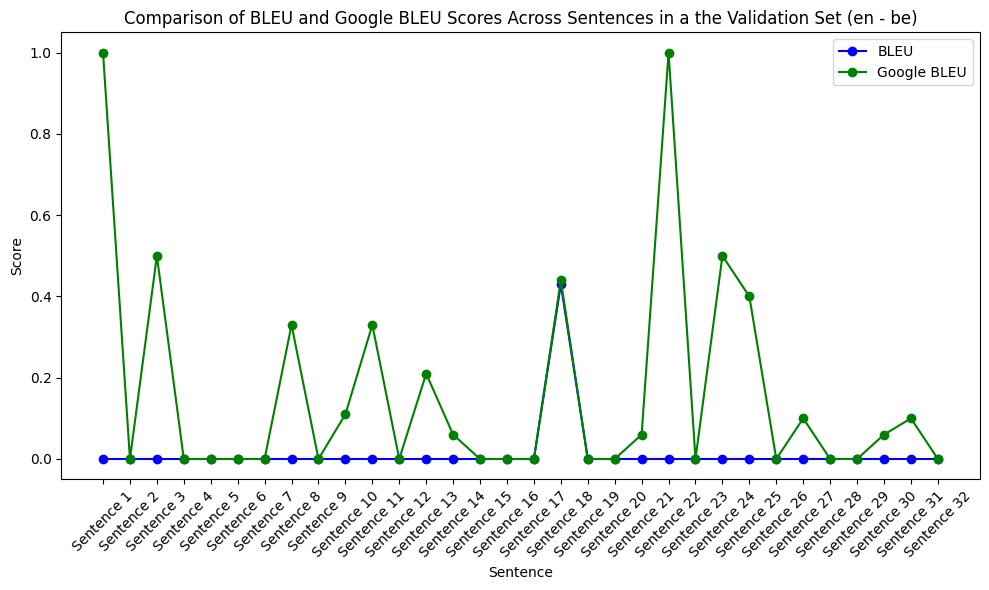

In [ ]:
sentences = [f"Sentence {i+1}" for i in range(32)]

bleu_scores = model1_result_dict_val_en_be['bleu_score_list']
google_bleu_scores = model1_result_dict_val_en_be['google_bleu_score_list']

# Create a DataFrame to hold the scores
df = pd.DataFrame({
    'Sentence': sentences,
    'BLEU': bleu_scores,
    'Google BLEU': google_bleu_scores,
})

# Plotting
plt.figure(figsize=(10, 6))

# Plot each score type
plt.plot(df['Sentence'], df['BLEU'], label='BLEU', marker='o', linestyle='-', color='b')
plt.plot(df['Sentence'], df['Google BLEU'], label='Google BLEU', marker='o', linestyle='-', color='g')

# Adding labels and title
plt.xlabel('Sentence')
plt.ylabel('Score')
plt.title('Comparison of BLEU and Google BLEU Scores Across Sentences in a the Validation Set (en - be)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

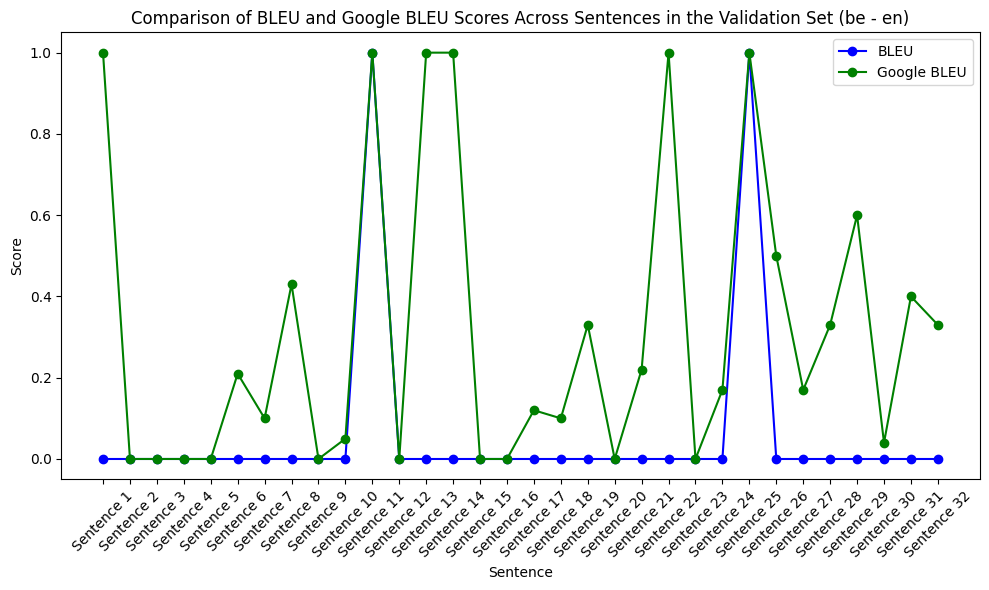

In [ ]:
sentences = [f"Sentence {i+1}" for i in range(32)]

bleu_scores = model1_result_dict_val_be_en['bleu_score_list']
google_bleu_scores = model1_result_dict_val_be_en['google_bleu_score_list']

# Create a DataFrame to hold the scores
df = pd.DataFrame({
    'Sentence': sentences,
    'BLEU': bleu_scores,
    'Google BLEU': google_bleu_scores,
})

# Plotting
plt.figure(figsize=(10, 6))

# Plot each score type
plt.plot(df['Sentence'], df['BLEU'], label='BLEU', marker='o', linestyle='-', color='b')
plt.plot(df['Sentence'], df['Google BLEU'], label='Google BLEU', marker='o', linestyle='-', color='g')

# Adding labels and title
plt.xlabel('Sentence')
plt.ylabel('Score')
plt.title('Comparison of BLEU and Google BLEU Scores Across Sentences in the Validation Set (be - en)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

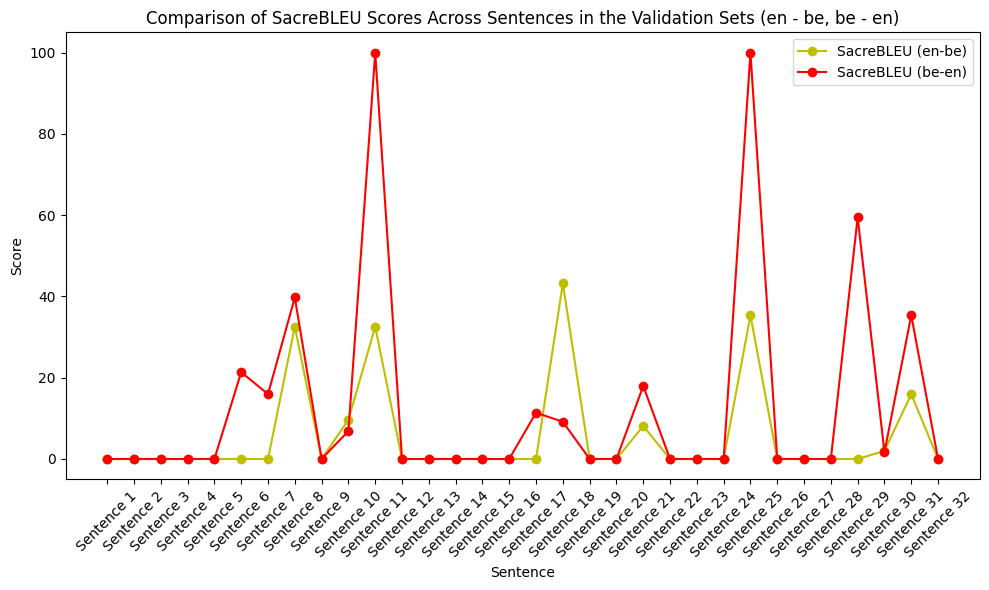

In [ ]:
sentences = [f"Sentence {i+1}" for i in range(32)]
sacrebleu_scores_en_be = model1_result_dict_val_en_be['sacrebleu_score_list']
sacrebleu_score_be_en = model1_result_dict_val_be_en['sacrebleu_score_list']

# Create a DataFrame to hold the scores
df = pd.DataFrame({
    'Sentence': sentences,
    'SacreBLEU (en-be)': sacrebleu_scores_en_be,
    'SacreBLEU (be-en)': sacrebleu_scores_be_en,
})

# Plotting
plt.figure(figsize=(10, 6))

# Plot each score type
plt.plot(df['Sentence'], df['SacreBLEU (en-be)'], label='SacreBLEU (en-be)', marker='o', linestyle='-', color='y')
plt.plot(df['Sentence'], df['SacreBLEU (be-en)'], label='SacreBLEU (be-en)', marker='o', linestyle='-', color='r')

# Adding labels and title
plt.xlabel('Sentence')
plt.ylabel('Score')
plt.title('Comparison of SacreBLEU Scores Across Sentences in the Validation Sets (en - be, be - en)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

**Note**:

**Model 2**

Unfortunately, I have not found any specifications about the specific tokens to use in this model for selection of the language pair and the translation direction, so I am using here a prompt discribing the task before the text to translate.    

In [ ]:
#One sentence

mt5_en_be_sentence = "Translate from English to Belarusian: Hello, how are you?"

mt5_be_en_sentence = "Translate from Belarusian to English: Прывітанне, як справы?"

1.   One Sentence Analysis


In [ ]:
# Tokenize input
input_ids = mt5_tokenizer(mt5_en_be_sentence, return_tensors="pt").input_ids

# Generate translation
output_ids = mt5_model.generate(input_ids)
translated_text = mt5_tokenizer.decode(output_ids[0], skip_special_tokens=True)

# Print result
print("Translated Text:", translated_text)

Translated Text: <extra_id_0>


In [ ]:
# Tokenize input
input_ids = mt5_tokenizer(mt5_be_en_sentence, return_tensors="pt").input_ids

# Generate translation
output_ids = mt5_model.generate(input_ids)
translated_text = mt5_tokenizer.decode(output_ids[0], skip_special_tokens=True)

# Print result
print("Translated Text:", translated_text)

Translated Text: <extra_id_0>


2.   Set of Sentences Analysis

In [ ]:
for sentence in en_be_sentences:
    input_text = f"translate English to Belarusian: {sentence}"
    input_ids = mt5_tokenizer.encode(input_text, return_tensors="pt")
    output_ids = mt5_model.generate(input_ids, max_length=128, num_beams=4, early_stopping=True)
    translated_text = mt5_tokenizer.decode(output_ids[0], skip_special_tokens=True)
    print(f"Original: {sentence}")
    print(f"Translated: {translated_text}\n")

Original: I am learning programming.
Translated: <extra_id_0>

Original: This is an amazing model!
Translated: <extra_id_0>

Original: How is the weather today?
Translated: <extra_id_0>



In [ ]:
for sentence in be_en_sentences:
    input_text = f"translate Belarusian to English: {sentence}"
    input_ids = mt5_tokenizer.encode(input_text, return_tensors="pt")
    output_ids = mt5_model.generate(input_ids, max_length=128, num_beams=4, early_stopping=True)
    translated_text = mt5_tokenizer.decode(output_ids[0], skip_special_tokens=True)
    print(f"Original: {sentence}")
    print(f"Translated: {translated_text}\n")

Original: Я вучуся праграмаваць.
Translated: <extra_id_0>

Original: Гэта цудоўная мадэль!
Translated: <extra_id_0>

Original: Як надвор'е сёння?
Translated: <extra_id_0>




3.   Validation Set

In [ ]:
val_set = small_tokenized_dataset["val"]["source"]

def translate_text(text, direction="translate Belarusian to English: "):
    input_text = f"{direction} {text}"
    input_ids = mt5_tokenizer(input_text, return_tensors="pt").input_ids

    # Generate translation
    output_ids = mt5_model.generate(input_ids, max_length=128)
    translated_text = mt5_tokenizer.decode(output_ids[0], skip_special_tokens=True)

    return translated_text

translated_sentences = []
for sentence in val_set:
    translated = translate_text(sentence, direction="translate Belarusian to English: ")
    translated_sentences.append(translated)

# Print some results
for i in range(32):
    print(f"Original: {val_set[i]}")
    print(f"Translated: {translated_sentences[i]}\n")

Original: 2A
Translated: <extra_id_0>

Original: пакульYou are about to translate the 'For' COMMAND, there are some rules on how to translate it. Please see http: // edu. kde. org/ kturtle/ translator. php to learn how to properly translate it.
Translated: <extra_id_0>.

Original: Канчатак кароткага перапынку
Translated: <extra_id_0>

Original: City in Siberia Russia
Translated: <extra_id_0>

Original: weather condition
Translated: <extra_id_0>

Original: Звычайны фон
Translated: <extra_id_0>

Original: weather forecast
Translated: <extra_id_0>

Original: Рэдагаваць геаграфічныя звесткі...
Translated: <extra_id_0>

Original: Паказваць прагляд
Translated: <extra_id_0>

Original: Вось чаму ён злаваў.
Translated: <extra_id_0>

Original: Капіяваць... @ action
Translated: <extra_id_0>

Original: latvia. kgm
Translated: <extra_id_0>

Original: % 1 Kb/ s
Translated: <extra_id_0>

Original: & Выканаць@ title: menu
Translated: <extra_id_0>

Original: Настаўленні% 1
Translated: <extra_id_0>

Ori

In [ ]:
val_set = small_tokenized_dataset["val"]["translation"]

def translate_text(text, direction="translate English to Belarusian"):
    input_text = f"{direction} {text}"
    input_ids = mt5_tokenizer(input_text, return_tensors="pt").input_ids

    # Generate translation
    output_ids = mt5_model.generate(input_ids, max_length=128)
    translated_text = mt5_tokenizer.decode(output_ids[0], skip_special_tokens=True)

    return translated_text

translated_sentences = []
for sentence in val_set:
    translated = translate_text(sentence, direction="translate English to Belarusian")
    translated_sentences.append(translated)

# Print some results
for i in range(32):
    print(f"Original: {val_set[i]}")
    print(f"Translated: {translated_sentences[i]}\n")

Original: 2A
Translated: <extra_id_0>

Original: while
Translated: <extra_id_0>

Original: End of a short break
Translated: <extra_id_0>

Original: Irkutsk
Translated: <extra_id_0>

Original: Mixed Rain and Drizzle
Translated: <extra_id_0>

Original: Link Text on Normal Background
Translated: <extra_id_0>

Original: Chance Snow/ Sleet
Translated: <extra_id_0>

Original: Select Categories...
Translated: <extra_id_0>

Original: Show Preview
Translated: <extra_id_0>

Original: That is why he got angry.
Translated: <extra_id_0>

Original: & Copy...
Translated: <extra_id_0>

Original: Saldus
Translated: <extra_id_0>

Original: %1 kbps
Translated: <extra_id_0>

Original: & Run
Translated: <extra_id_0>

Original: Photos Settings
Translated: <extra_id_0>

Original: KWeather
Translated: <extra_id_0>

Original: Apply the patch to another folder/ file
Translated: <extra_id_0>

Original: The MODE() function returns the most frequently occurring value in the data set.
Translated: <extra_id_0>

Orig

**Note**: Unfortunalelly, none of the sentences and sets were translated, but got only <extra_id_O> as output, which should mean that the model is not trained on such tasks, although it was said on the model description page on HuggingFace and it should solve them after fine-tuning. Because of this outnput I did not add any metrics calcualtions.

**Source**: https://www.aimodels.fyi/models/huggingFace/mt5-small-google

# Fine-tuning Model 2

In [2]:
from datasets import load_dataset

ds = load_dataset("Helsinki-NLP/opus-100", "be-en")

ModuleNotFoundError: No module named 'datasets'

In [ ]:
print(ds["train"][:10])

{'translation': [{'en': 'The time now is 05:08 .', 'fr': 'The time now is 05:05 .'}, {'en': 'This Regulation shall enter into force on the seventh day following its publication in the Official Journal of the European Union.', 'fr': "Le présent règlement entre en vigueur le septième jour suivant celui de sa publication au Journal officiel de l'Union européenne."}, {'en': "Hello, what's that?", 'fr': "Qu'est-ce que c'est que ça ?"}, {'en': 'And then I will teach you everything i know.', 'fr': "Et alors, je t'apprendrai tout ce que je sais."}, {'en': 'Did you find something?', 'fr': 'Par ici !'}, {'en': 'Article 6', 'fr': 'Article 6'}, {'en': "Oh, honey, it's not your fault.", 'fr': "- Tu n'es pas responsable."}, {'en': "I'm onto him now.", 'fr': 'Je le tiens.'}, {'en': "DG XVI's Internet site (electronic address: http://www.cec.lu/en/comm/dg16/dg16home.html) now contains detailed information in English on pilot projects on innovation, the Information society, new sources of employment an

In [ ]:
print(ds)

DatasetDict({
    test: Dataset({
        features: ['translation'],
        num_rows: 2000
    })
    train: Dataset({
        features: ['translation'],
        num_rows: 1000000
    })
    validation: Dataset({
        features: ['translation'],
        num_rows: 2000
    })
})


In [ ]:
from datasets import DatasetDict

small_dataset = DatasetDict(
    train = ds['train'].shuffle(seed=24).select(range(2000)),
    val = ds['validation'].shuffle(seed=24).select(range(200)),
    test = ds['test'].shuffle(seed=24).select(range(200)),
)

In [ ]:
print(small_dataset['train'][:10])

{'translation': [{'en': 'amending Regulation (EC) No 62/2006 concerning the technical specification for interoperability relating to the telematic applications for freight subsystem of the trans-European conventional rail system', 'fr': 'modifiant le règlement (CE) no 62/2006 relatif à la spécification technique d’interopérabilité concernant le sous-système «Applications télématiques au service du fret» du système ferroviaire transeuropéen conventionnel'}, {'en': 'These could include a listing of all infrastructure assets on reserve, their expected life cycle, their current condition, their asset replacement value, their maintenance project value, deficiencies, and key performance indicators.', 'fr': "Cela pourrait comprendre la liste de tous les biens d'infrastructure dans les réserves, leur cycle de vie prévu, leur état actuel, leur valeur de remplacement, leurs coûts d'entretien, les travaux à effectuer pour les rendre conformes et leurs indicateurs clés de rendement."}, {'en': 'Hel

In [ ]:
print(small_dataset)

DatasetDict({
    train: Dataset({
        features: ['translation'],
        num_rows: 2000
    })
    val: Dataset({
        features: ['translation'],
        num_rows: 200
    })
    test: Dataset({
        features: ['translation'],
        num_rows: 200
    })
})


In [ ]:
from transformers import AutoTokenizer

source_lang = "en"
target_lang = "fr"
prefix = "translate English to French: "

checkpoint = "google-t5/t5-small"
mt5_tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def preprocess_function(examples):
    inputs = [prefix + example[source_lang] for example in examples["translation"]]
    targets = [example[target_lang] for example in examples["translation"]]
    model_inputs = mt5_tokenizer(inputs, text_target=targets, max_length=128, truncation=True)
    return model_inputs

tokenized = small_dataset.map(preprocess_function, batched=True)

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

In [ ]:
from transformers import DataCollatorForSeq2Seq
import evaluate

data_collator = DataCollatorForSeq2Seq(tokenizer=mt5_tokenizer, model=checkpoint)
metric = evaluate.load("sacrebleu")

In [ ]:
import numpy as np

def postprocess_text(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [[label.strip()] for label in labels]
    return preds, labels

def compute_metrics(eval_preds):
    preds, labels = eval_preds
    if isinstance(preds, tuple):
        preds = preds[0]
    decoded_preds = mt5_tokenizer.batch_decode(preds, skip_special_tokens=True)
    labels = np.where(labels != -100, labels, mt5_tokenizer.pad_token_id)
    decoded_labels = mt5_tokenizer.batch_decode(labels, skip_special_tokens=True)
    decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)
    result = metric.compute(predictions=decoded_preds, references=decoded_labels)
    result = {"bleu": result["score"]}
    prediction_lens = [np.count_nonzero(pred != mt5_tokenizer.pad_token_id) for pred in preds]
    result["gen_len"] = np.mean(prediction_lens)
    result = {k: round(v, 4) for k, v in result.items()}
    return result

In [ ]:
from transformers import AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer

model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint)

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
training_args = Seq2SeqTrainingArguments(
    output_dir="my_awesome_en_fr_translation_model",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    #save_total_limit=3,
    num_train_epochs=3,
    predict_with_generate=True,
    fp16=True, #change to bf16=True for XPU
    report_to='none',
    seed=224
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized["train"],
    eval_dataset=tokenized["val"],
    processing_class=mt5_tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch,Training Loss,Validation Loss,Bleu,Gen Len
1,No log,1.200328,9.887800,17.265000
2,No log,1.178339,9.956300,17.245000
3,No log,1.174606,9.973600,17.250000


TrainOutput(global_step=375, training_loss=1.3946106770833333, metrics={'train_runtime': 69.012, 'train_samples_per_second': 86.941, 'train_steps_per_second': 5.434, 'total_flos': 120394991271936.0, 'train_loss': 1.3946106770833333, 'epoch': 3.0})

In [ ]:
from transformers import pipeline

text = "translate English to French: Legumes share resources with nitrogen-fixing bacteria."

inputs = mt5_tokenizer(text, return_tensors="pt").input_ids
model = AutoModelForSeq2SeqLM.from_pretrained("my_awesome_en_fr_translation_model/checkpoint-375")
outputs = model.generate(inputs, max_new_tokens=40, do_sample=True, top_k=30, top_p=0.95)
translated_text = mt5_tokenizer.decode(outputs[0], skip_special_tokens=True)

print(translated_text)

Les légumes partagent des ressources avec des bactéries fixatrices de l'azote.


In [ ]:
from transformers import pipeline

text = "Legumes share resources with nitrogen-fixing bacteria."

translator = pipeline("translation_en_to_be", model="my_awesome_en_fr_translation_model/checkpoint-375")

translator(text)

Device set to use cuda:0


[{'translation_text': 'Legumes partage Ressourcen mit bacteria, die die Stickstoff fixieren.'}]

In [ ]:
import numpy as np
from transformers import TrainingArguments, Trainer

In [ ]:
def preprocess_function(examples):
    model_inputs = mt5_tokenizer(examples["source"], max_length=128, truncation=True)
    with mt5_tokenizer.as_target_tokenizer():
        labels = mt5_tokenizer(examples["translation"], max_length=128, truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_datasets = small_be_en_dataset.map(preprocess_function, batched=True)

from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer=mt5_tokenizer, model=mt5_model)

arguments = TrainingArguments(
    output_dir="/content/drive/MyDrive/Colab Notebooks/sample_cl_trainer",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    logging_steps=8,
    num_train_epochs=5,
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    report_to='none',
    seed=224
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    decoded_preds = mt5_tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = mt5_tokenizer.batch_decode(labels, skip_special_tokens=True)
    references = [[label] for label in decoded_labels]
    result1 = bleu.compute(predictions=decoded_preds, references=references)
    result2 = google_bleu.compute(predictions=decoded_preds, references=references)
    result3 = sacrebleu.compute(predictions=decoded_preds, references=references)
    return {"bleu_score": result1["bleu"],
            "google_score": result2["google_bleu"],
            "sacrebleu": result3["score"]
            }

trainer = Trainer(
    model=mt5_model,
    args=arguments,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["val"],
    tokenizer=mt5_tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

Map:   0%|          | 0/128 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3953: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/32 [00:00<?, ? examples/s]

Map:   0%|          | 0/32 [00:00<?, ? examples/s]

<ipython-input-116-787afc03c09e>:43: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch,Training Loss,Validation Loss


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 32) + inhomogeneous part.

In [ ]:
results = trainer.predict(small_tokenized_dataset['val'])

print(results)

In [ ]:
# Complete the code here to load one of the checkpoints for the fine-tuned model
fine_tuned_mt5_model = AutoModelSecForSeq.from_pretrained("/content/drive/MyDrive/Colab Notebooks/sample_cl_trainer/checkpoint-40")

model_inputs = mt5_tokenizer(small_tokenized_dataset['val']['text'], padding=True, truncation=True, return_tensors='pt')
outputs = fine_tuned_mt5_model(**model_inputs, output_hidden_states=True)

# Performance of the Model after Fine-tuning

One Sentence

In [ ]:
# Tokenize input
input_ids = mt5_tokenizer(mt5_en_be_sentence, return_tensors="pt").input_ids

# Generate translation
output_ids = fine_tuned_mt5_model.generate(input_ids)
translated_text = mt5_tokenizer.decode(output_ids[0], skip_special_tokens=True)

# Print result
print("Translated Text:", translated_text)

Translated Text: <extra_id_0>


In [ ]:
bleu_score = compute_bleu_score(translated_text, en_be_reference)
google_bleu_score = compute_google_bleu_score(translated_text, en_be_reference)
sacrebleu_score = compute_sacrebleu_score(translated_text, en_be_reference)

print(f"One en-be sentence Scores (Model 2):\nBLEU = {bleu_score},\nGoogle BLEU = {google_bleu_score},\nSacreBLEU = {sacrebleu_score}")

One en-be sentence Scores (Model 1):
BLEU = 0.0,
Google BLEU = 0.29,
SacreBLEU = 23.64


In [ ]:
# Tokenize input
input_ids = mt5_tokenizer(mt5_be_en_sentence, return_tensors="pt").input_ids

# Generate translation
output_ids = fine_tuned_mt5_model.generate(input_ids)
translated_text = mt5_tokenizer.decode(output_ids[0], skip_special_tokens=True)

# Print result
print("Translated Text:", translated_text)

Translated Text: <extra_id_0>.


In [ ]:
bleu_score = compute_bleu_score(translated_text, be_en_reference)
google_bleu_score = compute_google_bleu_score(translated_text, be_en_reference)
sacrebleu_score = compute_sacrebleu_score(translated_text, be_en_reference)

print(f"One be-en sentence Scores (Model 2):\nBLEU = {bleu_score},\nGoogle BLEU = {google_bleu_score},\nSacreBLEU = {sacrebleu_score}")

One be-en sentence Scores (Model 1):
BLEU = 0.0,
Google BLEU = 0.17,
SacreBLEU = 11.51


Set of Sentences

In [ ]:
en_be_results = {}

for sentence in en_be_sentences:
    input_text = f"translate English to Belarusian: {sentence}"
    input_ids = mt5_tokenizer.encode(input_text, return_tensors="pt")
    output_ids = fine_tuned_mt5_model.generate(input_ids, max_length=128, num_beams=4, early_stopping=True)
    translated_text = mt5_tokenizer.decode(output_ids[0], skip_special_tokens=True)
    print(f"Original: {sentence}")
    print(f"Translated: {translated_text}\n")
    en_be_results[sentence] = translated_text

print(en_be_results)

NameError: name 'fine_tuned_mt5_model' is not defined

In [ ]:
# Extract translations and reference sentences
translated_texts = list(en_be_results.values())
reference_texts = list(be_en_sentences)

# Iterate through each sentence and compute scores
for i, (translated, reference) in enumerate(zip(translated_texts, reference_texts), 1):
    bleu_score = compute_bleu_score(translated, reference)
    google_bleu_score = compute_google_bleu_score(translated, reference)
    sacrebleu_score = compute_sacrebleu_score(translated, reference)

    # Print the results
    print(f"en-be Sentence Set Scores (Model 2):\nSentence {i}:\n"
          f"BLEU = {bleu_score}\n"
          f"Google BLEU = {google_bleu_score}\n"
          f"SacreBLEU = {sacrebleu_score}\n")

In [ ]:
be_en_results = {}

for sentence in be_en_sentences:
    input_text = f"translate Belarusian to English: {sentence}"
    input_ids = mt5_tokenizer.encode(input_text, return_tensors="pt")
    output_ids = fine_tuned_mt5_model.generate(input_ids, max_length=128, num_beams=4, early_stopping=True)
    translated_text = mt5_tokenizer.decode(output_ids[0], skip_special_tokens=True)
    print(f"Original: {sentence}")
    print(f"Translated: {translated_text}\n")
    be_en_results[sentence] = translated_text

print(be_en_results)

NameError: name 'fine_tuned_mt5_model' is not defined

In [ ]:
# Extract translations and reference sentences
translated_texts = list(be_en_results.values())
reference_texts = list(en_be_sentences)

# Iterate through each sentence and compute scores
for i, (translated, reference) in enumerate(zip(translated_texts, reference_texts), 1):
    bleu_score = compute_bleu_score(translated, reference)
    google_bleu_score = compute_google_bleu_score(translated, reference)
    sacrebleu_score = compute_sacrebleu_score(translated, reference)

    # Print the results
    print(f"en-be Sentence Set Scores (Model 2):\nSentence {i}:\n"
          f"BLEU = {bleu_score}\n"
          f"Google BLEU = {google_bleu_score}\n"
          f"SacreBLEU = {sacrebleu_score}\n")

Validation Set

In [ ]:
val_set = small_tokenized_dataset["val"]["source"]

def translate_text(text, direction="translate Belarusian to English: "):
    input_text = f"{direction} {text}"
    input_ids = mt5_tokenizer(input_text, return_tensors="pt").input_ids

    # Generate translation
    output_ids = fine_tuned_mt5_model.generate(input_ids, max_length=128)
    translated_text = mt5_tokenizer.decode(output_ids[0], skip_special_tokens=True)

    return translated_text

translated_sentences = []
for sentence in val_set:
    translated = translate_text(sentence, direction="translate Belarusian to English: ")
    translated_sentences.append(translated)

# Print some results
for i in range(32):
    print(f"Original: {val_set[i]}")
    print(f"Translated: {translated_sentences[i]}\n")

print(len(translated_sentences))

NameError: name 'fine_tuned_mt5_model' is not defined

In [ ]:
model2_result_dict_val_be_en = {}

model2_result_dict_val_be_en['bleu_score_list'] = []
model2_result_dict_val_be_en['google_bleu_score_list'] = []
model2_result_dict_val_be_en['sacrebleu_score_list'] = []

print(model2_result_dict_val_be_en.items())

dict_items([('bleu_score_list', []), ('google_bleu_score_list', []), ('sacrebleu_score_list', [])])


In [ ]:
# Extract translations and reference sentences
translated_texts = translated_sentences
reference_texts = val_set = small_tokenized_dataset["val"]["translation"]

# Iterate through each sentence and compute scores
for i, (translated, reference) in enumerate(zip(translated_texts, reference_texts), 1):
    bleu_score = compute_bleu_score(translated, reference)
    google_bleu_score = compute_google_bleu_score(translated, reference)
    sacrebleu_score = compute_sacrebleu_score(translated, reference)

    model2_result_dict_val_be_en['bleu_score_list'].append(bleu_score)
    model2_result_dict_val_be_en['google_bleu_score_list'].append(google_bleu_score)
    model2_result_dict_val_be_en['sacrebleu_score_list'].append(sacrebleu_score)

    print(f"be-en Validation Set Scores (Model 2):\nSentence {i}:\n"
          f"BLEU = {bleu_score}\n"
          f"Google BLEU = {google_bleu_score}\n"
          f"SacreBLEU = {sacrebleu_score}\n")

print(model2_result_dict_val_be_en['bleu_score_list'])
print(model2_result_dict_val_be_en['google_bleu_score_list'])
print(model2_result_dict_val_be_en['sacrebleu_score_list'])

print(len(model2_result_dict_val_be_en['bleu_score_list']))
print(len(model2_result_dict_val_be_en['google_bleu_score_list']))
print(len(model2_result_dict_val_be_en['sacrebleu_score_list']))

NameError: name 'model2_result_dict_val_be_en' is not defined

In [ ]:
val_set = small_tokenized_dataset["val"]["translation"]

def translate_text(text, direction="translate English to Belarusian"):
    input_text = f"{direction} {text}"
    input_ids = mt5_tokenizer(input_text, return_tensors="pt").input_ids

    # Generate translation
    output_ids = fine_tuned_mt5_model.generate(input_ids, max_length=128)
    translated_text = mt5_tokenizer.decode(output_ids[0], skip_special_tokens=True)

    return translated_text

translated_sentences = []
for sentence in val_set:
    translated = translate_text(sentence, direction="translate English to Belarusian")
    translated_sentences.append(translated)

# Print some results
for i in range(32):
    print(f"Original: {val_set[i]}")
    print(f"Translated: {translated_sentences[i]}\n")

NameError: name 'fine_tuned_mt5_model' is not defined

In [ ]:
model2_result_dict_val_en_be = {}

model2_result_dict_val_en_be['bleu_score_list'] = []
model2_result_dict_val_en_be['google_bleu_score_list'] = []
model2_result_dict_val_en_be['sacrebleu_score_list'] = []

print(model2_result_dict_val_en_be.items())

dict_items([('bleu_score_list', []), ('google_bleu_score_list', []), ('sacrebleu_score_list', [])])


In [ ]:
# Extract translations and reference sentences
translated_texts = translated_sentences
reference_texts = val_set = small_tokenized_dataset["val"]["source"]

# Iterate through each sentence and compute scores
for i, (translated, reference) in enumerate(zip(translated_texts, reference_texts), 1):
    bleu_score = compute_bleu_score(translated, reference)
    google_bleu_score = compute_google_bleu_score(translated, reference)
    sacrebleu_score = compute_sacrebleu_score(translated, reference)

    model2_result_dict_val_en_be['bleu_score_list'].append(bleu_score)
    model2_result_dict_val_en_be['google_bleu_score_list'].append(google_bleu_score)
    model2_result_dict_val_en_be['sacrebleu_score_list'].append(sacrebleu_score)

    print(f"en-be Validation Set Scores (Model 2):\nSentence {i}:\n"
          f"BLEU = {bleu_score}\n"
          f"Google BLEU = {google_bleu_score}\n"
          f"SacreBLEU = {sacrebleu_score}\n")

print(model2_result_dict_val_en_be['bleu_score_list'])
print(model2_result_dict_val_en_be['google_bleu_score_list'])
print(model2_result_dict_val_en_be['sacrebleu_score_list'])

print(len(model2_result_dict_val_en_be['bleu_score_list']))
print(len(model2_result_dict_val_en_be['google_bleu_score_list']))
print(len(model2_result_dict_val_en_be['sacrebleu_score_list']))

NameError: name 'model2_result_dict_val_en_be' is not defined

Vidualisation of Model 2 Scores

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
sentences = [f"Sentence {i+1}" for i in range(32)]

bleu_scores = model2_result_dict_val_en_be['bleu_score_list']
google_bleu_scores = model2_result_dict_val_en_be['google_bleu_score_list']

# Create a DataFrame to hold the scores
df = pd.DataFrame({
    'Sentence': sentences,
    'BLEU': bleu_scores,
    'Google BLEU': google_bleu_scores,
})

# Plotting
plt.figure(figsize=(10, 6))

# Plot each score type
plt.plot(df['Sentence'], df['BLEU'], label='BLEU', marker='o', linestyle='-', color='b')
plt.plot(df['Sentence'], df['Google BLEU'], label='Google BLEU', marker='o', linestyle='-', color='g')

# Adding labels and title
plt.xlabel('Sentence')
plt.ylabel('Score')
plt.title('Comparison of BLEU and Google BLEU Scores Across Sentences in a the Validation Set (en - be)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

NameError: name 'model2_result_dict_val_en_be' is not defined

In [ ]:
sentences = [f"Sentence {i+1}" for i in range(32)]

bleu_scores = model2_result_dict_val_be_en['bleu_score_list']
google_bleu_scores = model2_result_dict_val_be_en['google_bleu_score_list']

# Create a DataFrame to hold the scores
df = pd.DataFrame({
    'Sentence': sentences,
    'BLEU': bleu_scores,
    'Google BLEU': google_bleu_scores,
})

# Plotting
plt.figure(figsize=(10, 6))

# Plot each score type
plt.plot(df['Sentence'], df['BLEU'], label='BLEU', marker='o', linestyle='-', color='b')
plt.plot(df['Sentence'], df['Google BLEU'], label='Google BLEU', marker='o', linestyle='-', color='g')

# Adding labels and title
plt.xlabel('Sentence')
plt.ylabel('Score')
plt.title('Comparison of BLEU and Google BLEU Scores Across Sentences in the Validation Set (be - en)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

NameError: name 'model2_result_dict_val_be_en' is not defined

In [ ]:
sentences = [f"Sentence {i+1}" for i in range(32)]
sacrebleu_scores_en_be = model2_result_dict_val_en_be['sacrebleu_score_list']
sacrebleu_score_be_en = model2_result_dict_val_be_en['sacrebleu_score_list']

# Create a DataFrame to hold the scores
df = pd.DataFrame({
    'Sentence': sentences,
    'SacreBLEU (en-be)': sacrebleu_scores_en_be,
    'SacreBLEU (be-en)': sacrebleu_scores_be_en,
})

# Plotting
plt.figure(figsize=(10, 6))

# Plot each score type
plt.plot(df['Sentence'], df['SacreBLEU (en-be)'], label='SacreBLEU (en-be)', marker='o', linestyle='-', color='y')
plt.plot(df['Sentence'], df['SacreBLEU (be-en)'], label='SacreBLEU (be-en)', marker='o', linestyle='-', color='r')

# Adding labels and title
plt.xlabel('Sentence')
plt.ylabel('Score')
plt.title('Comparison of SacreBLEU Scores Across Sentences in the Validation Sets (en - be, be - en)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

NameError: name 'model2_result_dict_val_en_be' is not defined

# Visualisation

In [ ]:
from torch.utils.tensorboard import SummaryWriter
import re
import torch
import tensorflow as tf
import tensorboard as tb
import os

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/sample_cl_trainer/checkpoint-40/results_vis"
layer=0
if not os.path.exists(path):
  os.mkdir(path)

while layer in range(len(outputs['hidden_states'])):
  if not os.path.exists(path+'/layer_' + str(layer)):
    os.mkdir(path+'/layer_' + str(layer))

  example = 0
  tensors = []
  labels = []

  while example in range(len(outputs['hidden_states'][layer])):
    sp_token_position = 0
    for token in model_inputs['input_ids'][example]:
      if token != 101:
        sp_token_position += 1
      else:
        tensor = outputs['hidden_states'][layer][example][sp_token_position]
        tensors.append(tensor)
        break

    label = [small_tokenized_dataset['val']['text'][example],str(small_tokenized_dataset['val']['label'][example])]
    labels.append(label)
    example +=1

  writer=SummaryWriter(path+'/layer_' + str(layer))
  writer.add_embedding(torch.stack(tensors), metadata=labels, metadata_header=['Source','Tranlsation'])

  layer+=1

Now you can upload metadata and tensor file into the TensorFlow Embedding Projector API.

👋 ⚒ Compare the visualization of Layer 1 and Layer 6. To this end, go to the API, click on the option Load and load the two TSV-files stored in your local results_viz folder in layer_1 first.

Change the setting Color byto Emotionand the visualization method to Custom instead of PCA. Take a screenshot of the visualization before you do the same for Layer 6.

# References
*   Model 1: https://huggingface.co/WelfCrozzo/T5-L128-belarusian
*   Model 2: https://huggingface.co/google/mt5-small
*   Fine-tuning Dataset: https://huggingface.co/datasets/Helsinki-NLP/opus-100/viewer/be-en
*   BLEU Score: https://huggingface.co/spaces/evaluate-metric/bleu
*   SacreBLEU: https://huggingface.co/spaces/evaluate-metric/sacrebleu
*   Google BLEU Score: https://huggingface.co/spaces/evaluate-metric/google_bleu
*   mT5 Paper: https://arxiv.org/pdf/2010.11934
*   mt5 Video: https://www.youtube.com/watch?v=xbLo6jt3_Bc
*   C4 Training Dataset of mt5: https://www.tensorflow.org/datasets/catalog/c4#c4multilingual
*   mt5 on AIModels.fyi: https://www.aimodels.fyi/models/huggingFace/mt5-small-google
*   Tensorflow: https://projector.tensorflow.org/
*   mt5 for MT: https://stackoverflow.com/questions/76040850/can-mt5-model-on-huggingface-be-used-for-machine-translation
*   Fine-tuning Code Example: https://github.com/ejmejm/multilingual-nmt-mt5/blob/main/nmt_full_version.ipynb

